<a href="https://colab.research.google.com/github/sadyalrahul/Personal_Projects/blob/main/Califorina_housing_prices_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Loading Data**

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def fetch_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents = True,exist_ok = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = fetch_data()





upto this point the data is fetched from github and we have extracted the file which contains housing.csv file. The csv file is also read using pandas read_csv function.

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


info() will provide us information about the dataset

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


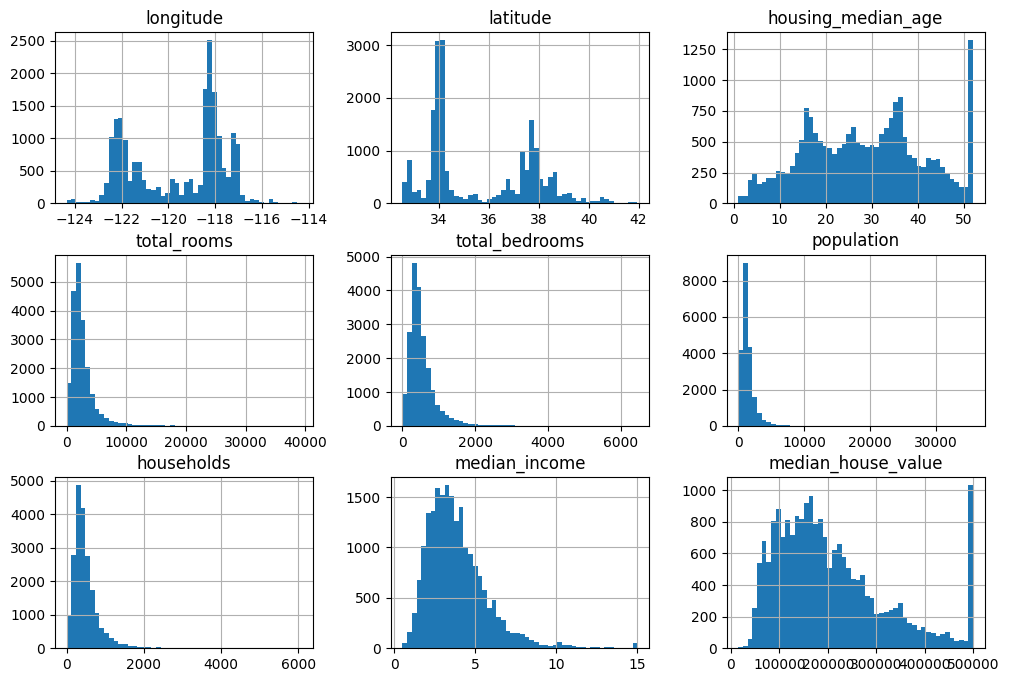

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(12,8))
plt.show()

**Creating a stratified Test set**

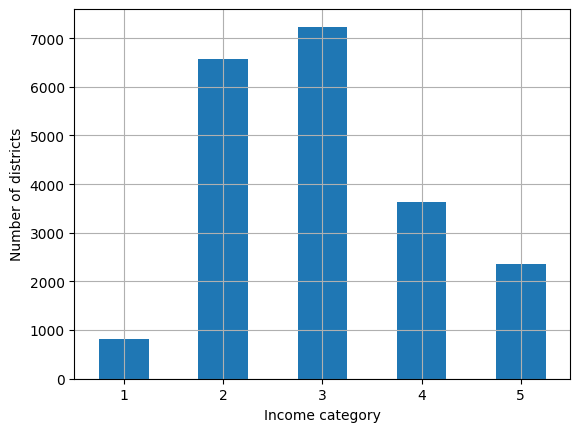

In [ ]:
import numpy as np

housing["income_cat"]=pd.cut(housing["median_income"],bins = [0. , 1.5,3.0,4.5,6.0,np.inf],labels = [1,2,3,4,5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
splitter = StratifiedShuffleSplit(n_splits = 10,test_size = 0.2,random_state = 42)
strat_splits = []
for test_index,train_index in splitter.split(housing,housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])




In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

to have only one stratified split by using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat",axis = 1, inplace =  True)

**Exploring The Data**

In [ ]:
housing = strat_train_set.copy()

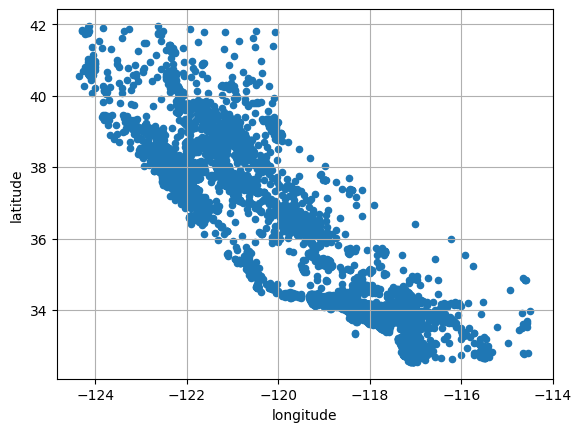

In [ ]:
housing.plot(kind ="scatter", x ="longitude", y = "latitude", grid = True)
plt.show()

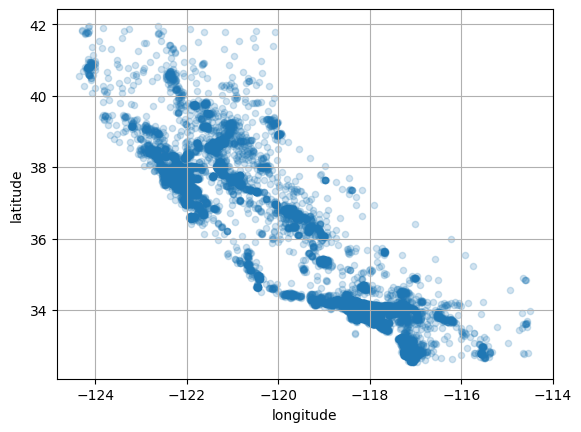

In [ ]:
housing.plot(kind ="scatter", x ="longitude", y = "latitude", grid = True, alpha=0.2)
plt.show()

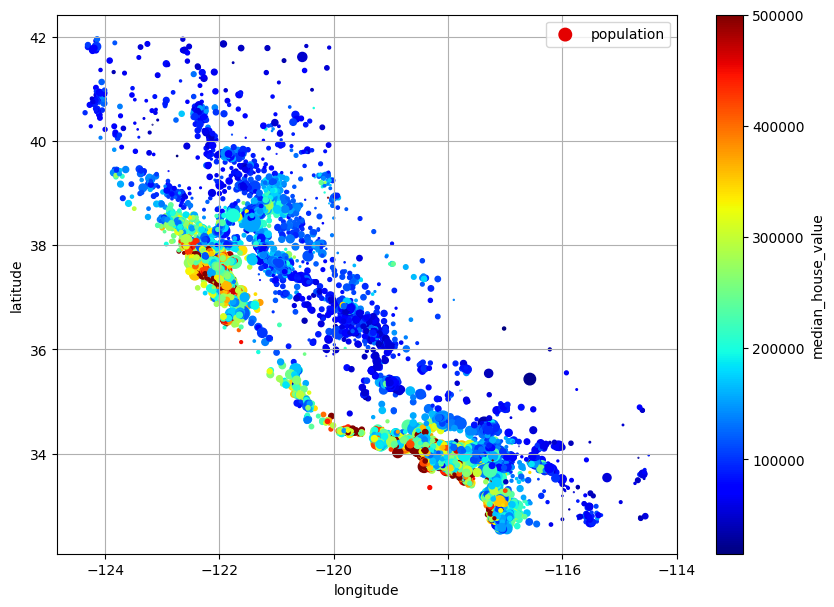

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, s = housing["population"]/100, label = "population",
             c = "median_house_value" ,cmap = "jet", colorbar = True , legend = True,sharex= False, figsize=(10, 7))
plt.show()

In [ ]:
corr_matrix = housing.corr()

<ipython-input-21-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='population'>

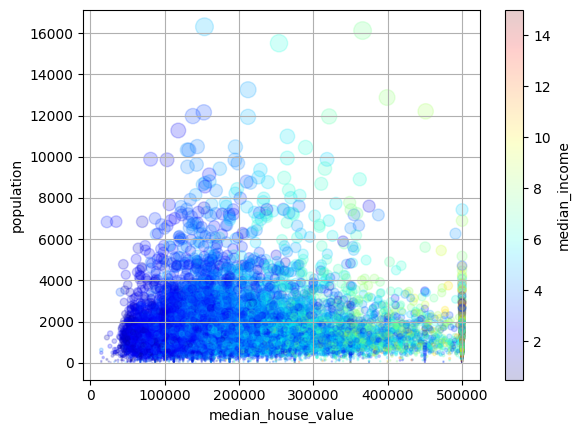

In [ ]:
housing.plot(kind = "scatter", y = "population" , x = "median_house_value", grid = True, alpha = 0.2,s =housing["population"]/100,cmap = "jet", c = "median_income")

**Preparing Data for Training Machines**

In [ ]:
housing = strat_train_set.drop("median_house_value",axis = 1)
training_labels = strat_train_set["median_house_value"].copy()


Cleaning Data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


In [ ]:
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
X =imputer.transform(housing_num)


In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index = housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Droping Outliers

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [ ]:
housing = housing.iloc[outlier_pred == 1]
training_labels = training_labels.iloc[outlier_pred == 1]

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 14973 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14305 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


Changing Categorical Values

In [ ]:
housing_cat = housing[["ocean_proximity"]]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_prox = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
hotencoder = OneHotEncoder()
onehot = hotencoder.fit_transform(housing_cat)
# 1 hot encoder returns a sparse matrix
onehot.toarray()#represents in an 2d array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

**Feature Scalling and Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scalar = StandardScaler()
housing_num_standarized =s_scalar.fit_transform(housing_num)

to find similarity measure we use Radial bias function.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
house_age_similar_to_35 = rbf_kernel(housing[["housing_median_age"]],[[35]],gamma = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
sd_scalar = StandardScaler()
tar_val_scaled = sd_scalar.fit_transform(training_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]],tar_val_scaled)
data_for_prediction = housing[["median_income"]].iloc[:10]
predictions =sd_scalar.inverse_transform(model.predict(data_for_prediction))

In [ ]:
predictions

array([[307649.58358784],
       [143451.50154782],
       [135759.63057829],
       [192702.83891231],
       [184498.77560018],
       [308804.26281633],
       [277039.35174472],
       [157568.24137625],
       [ 87492.24166142],
       [140162.68755851]])

The whole process of scaling target labels and taking its inverse Transform can be achieved by a simpler method also.

In [ ]:
from sklearn.compose import TransformedTargetRegressor
model1 = TransformedTargetRegressor(LinearRegression(),transformer =StandardScaler())
model1.fit(housing[["median_income"]],training_labels)
predictions2 = model1.predict(data_for_prediction)

In [ ]:
predictions2

array([307649.58358784, 143451.50154782, 135759.63057829, 192702.83891231,
       184498.77560018, 308804.26281633, 277039.35174472, 157568.24137625,
        87492.24166142, 140162.68755851])

the values of prediction and predictions2 are same


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

**Creating Pipelines**


In [ ]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),OneHotEncoder(handle_unknown="ignore"))

In [ ]:
from sklearn import set_config

set_config(display='diagram')

print(num_pipeline)
print(cat_pipeline)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
using_num_pipeline = num_pipeline.fit_transform(housing_num)
using_num_pipeline[:5]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.76070869,
        -0.78876841, -0.77572662, -0.75978881],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.74230601,
         0.38317548,  0.73137454, -0.85028088],
       [ 0.71136206, -0.87554898,  0.58980003,  0.79012465,  1.59575285,
         0.44437597,  1.75526303, -0.18036472]])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
processing = make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include = object)),)
housing_prepared = processing.fit_transform(housing)

In [ ]:
housing_pre_df = pd.DataFrame(housing_prepared,columns= processing.get_feature_names_out(),
    index=housing.index)
housing_pre_df.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
14973,0.595527,-0.692801,0.875904,-0.257539,-0.479342,-0.911423,-0.367756,1.383990,1.0,0.0,0.0,0.0,0.0
3785,-1.273032,1.361924,0.292345,-1.043780,-1.077558,-1.073350,-1.092179,-0.804668,0.0,1.0,0.0,0.0,0.0
14689,1.254713,-0.882693,-1.041504,1.711628,1.690829,0.924262,1.622055,-0.907196,0.0,1.0,0.0,0.0,0.0
20507,0.714907,-0.872955,0.542442,1.882783,3.262785,1.028580,3.466040,-0.148178,0.0,0.0,0.0,0.0,1.0
1286,-0.925272,1.167164,1.876291,-0.378774,-0.710769,-0.867828,-0.546510,-0.257533,0.0,1.0,0.0,0.0,0.0


Creating a single pipeline for Transformation of data, so that it can be used for machine learnig. This pipeline will take the data fill all the missing values with median of each column, using SimpleImputer. Scale every column to a common scale using StandardScaler and will transform categorical values to numeric values using OneHotEncoder.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()) #used to remove heavy tails in data
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape


(14448, 24)

In [ ]:
housing_prepared_df = pd.DataFrame(housing_prepared,columns =preprocessing.get_feature_names_out(),index = housing.index)
housing_prepared_df.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
14973,-0.565304,0.074939,-1.200913,-0.274529,-0.007682,-0.908110,-0.136144,1.294267,3.139028e-02,1.315244e-13,...,1.196061e-01,3.873861e-01,1.831276e-09,2.707939e-10,1.0,0.0,0.0,0.0,0.0,0.875904
3785,-0.224434,0.000689,-0.196311,-1.206885,-1.098512,-1.219404,-1.204125,-0.780797,1.696953e-24,7.348653e-01,...,2.095772e-08,5.594929e-18,2.742420e-01,2.717287e-01,0.0,1.0,0.0,0.0,0.0,0.292345
14689,-0.165222,0.007843,-0.644789,1.396464,1.371759,0.960053,1.342412,-0.945884,4.589686e-01,5.515240e-20,...,4.683531e-04,8.497461e-01,2.349706e-14,5.199438e-16,0.0,1.0,0.0,0.0,0.0,-1.041504
20507,1.073870,-0.705594,-1.461426,2.068564,1.454104,1.025452,2.112705,0.060755,1.241108e-01,1.095278e-15,...,3.237688e-02,5.480253e-01,3.068857e-11,4.496018e-12,0.0,0.0,0.0,0.0,1.0,0.542442
1286,-0.828027,0.175564,-0.856002,-0.583511,-0.139006,-0.832605,-0.349057,-0.059447,5.745476e-20,3.684812e-01,...,4.271822e-06,4.466924e-14,8.802665e-01,3.978624e-01,0.0,1.0,0.0,0.0,0.0,1.876291


Upto this point, the data is cleaned , scaled and transformed . Now its time to **Select a Model for Training**.

In [ ]:
from sklearn.linear_model import LinearRegression
l_r = make_pipeline(preprocessing,LinearRegression())
l_r.fit(housing,training_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e5...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e5cf1998ac0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_pred = l_r.predict(housing)
housing_pred[:5]

array([379379.0532712 , 118857.46390306,  96396.03479164, 343953.38904542,
       196252.87155287])

In [ ]:
training_labels.iloc[:5]

14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
1286      92600.0
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(training_labels,housing_pred, squared = False))

66012.83832242101


There is a huge difference between the predicted values and actual values.Therefore the model didn't performed well. So another model can be used instead of simple linear regression.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regrr = make_pipeline(preprocessing,DecisionTreeRegressor())
tree_regrr.fit(housing,training_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e5...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e5cf1998ac0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
TR_pred = tree_regrr.predict(housing)
TR_pred[:5]

array([483800., 101700.,  96100., 361800.,  92600.])

In [ ]:
training_labels.iloc[:5]

14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
1286      92600.0
Name: median_house_value, dtype: float64

In [ ]:
print(mean_squared_error(training_labels,TR_pred,squared = False))

0.0


Here the predicted values are equal to actual values.This may be a case of overfitting. To further evaluate the accuracy of this model validation needs to be done. For Validation a validation set is required and validation set is nothing but a subset of training set.

**Using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
trrsme = -cross_val_score(tree_regrr, housing, training_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(trrsme).describe()

count       10.000000
mean     65221.855453
std       1846.891603
min      61615.356362
25%      64054.266657
50%      65776.942171
75%      66184.096695
max      67818.551272
dtype: float64

Although, during training of decision Tree Regressor an error of 0 was achieved but when the decision tree Regressor model was validated using cross-validation an error of 65049 was shown(a case of overfitting). This error is similar to the error shown by the linear regressor model. So, it is concluded that this model also doesn't perform well in predicting the values of the houses.Therefore another model which is more powerful than previous models is trained.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RfR = make_pipeline(preprocessing,RandomForestRegressor())
RfR.fit(housing,training_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e5...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e5cf1998ac0>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
RFR_pred  =RfR.predict(housing)
RFR_pred[:5]

array([469900.11, 107258.  , 103467.  , 365925.09, 104116.  ])

In [ ]:
RFR_rsme = mean_squared_error(RFR_pred,training_labels,squared = False)
RFR_rsme

17143.8350462827

In [ ]:
forest_rmses = -cross_val_score(RfR, housing, training_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     45829.645275
std       1507.765394
min      43865.928964
25%      44406.125021
50%      45966.055441
75%      47230.929105
max      47634.132539
dtype: float64

For RandomForestRegressor the validation error is greater than training error which implies that the model is overfitted on training data. But among all the three model which were used, RandomForestRegressor model is much more promising.
Its performance can be enhanced by doing fine tuning of the model.

**Fine Tuning the Model**

one way of fine-tuning a model is to manually set hyperparameters and check for results every time but this type of process is tedious and time consuming. Another way is to use scikit-learn's **GridSearchCV** and **RandomizedSearchCV**. Note:- There are also other classes to search best hyperparameters. Here RandomSearchCV will be prefered over GridSearchCV as GridSearchCV tries every possible combintaions and take more time and computations resources.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

In [ ]:
full_pipeline = Pipeline([("preprocessing",preprocessing),("random_forest",RandomForestRegressor(random_state=40))])

In [ ]:
pram_dis = {'preprocessing__geo__n_clusters':randint(low = 3 , high = 50),'random_forest__max_features':randint(low = 2 , high = 20)}
rnd_srch = RandomizedSearchCV(full_pipeline,param_distributions=pram_dis,n_iter = 10 , cv = 3, scoring="neg_root_mean_squared_error",random_state = 40)
rnd_srch.fit(housing,training_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=40))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5cf197f970>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5cf197faf0>},
                   random_state=40, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_srch.best_params_

{'preprocessing__geo__n_clusters': 33, 'random_forest__max_features': 17}

In [ ]:
final_model = rnd_srch.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.04, 0.05, 0.09, 0.01, 0.01, 0.01, 0.01, 0.28, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.02, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.05, 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.12, 0.  ,
       0.  , 0.  , 0.02])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.28232882056085223, 'log__median_income'),
 (0.12196525802264963, 'cat__ocean_proximity_INLAND'),
 (0.09495172416329792, 'people_per_house__ratio'),
 (0.051490042201964424, 'geo__Cluster 27 similarity'),
 (0.05034808555063187, 'rooms_per_house__ratio'),
 (0.04084852328766103, 'bedrooms__ratio'),
 (0.022427231288552205, 'geo__Cluster 25 similarity'),
 (0.02101420464553407, 'remainder__housing_median_age'),
 (0.019829413217532284, 'geo__Cluster 8 similarity'),
 (0.018298956294277358, 'geo__Cluster 11 similarity'),
 (0.01554553036274427, 'geo__Cluster 13 similarity'),
 (0.014980100929645865, 'geo__Cluster 6 similarity'),
 (0.014024684638979006, 'geo__Cluster 30 similarity'),
 (0.013346211972378648, 'geo__Cluster 5 similarity'),
 (0.013076074364037925, 'geo__Cluster 14 similarity'),
 (0.012582149021976236, 'geo__Cluster 29 similarity'),
 (0.012359047929729795, 'geo__Cluster 26 similarity'),
 (0.010130163710290954, 'geo__Cluster 23 similarity'),
 (0.009979123973346816, 'geo__Cluster 4 si

**Evaluating on Test set**

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

44269.844665409844


**Saving final model**

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Deploying the model

In [ ]:
import joblib

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([463983.12, 107298.  ,  98282.  , 344568.06, 104219.  ])